# OUTLIERS PRESENTATION:

* OTHER METHODS TO FIND OUTLIERS:

* 1. USING LOWERFENCE AND UPPERFENCE METHOD:

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data=np.random.randn(50000)*20 + 20

In [3]:
q1 = np.quantile(data , 0.25)
print(q1)

6.3987712993770725


In [4]:
q3 = np.quantile(data, 0.75)
print(q3)

33.3317128279558


In [5]:
iqr = q3 - q1
print(iqr)

26.932941528578723


In [6]:
lowerfence = q1-(iqr*1.5)
print(lowerfence)

-34.00064099349101


In [7]:
upperfence = q3 + (iqr*1.5)
print(upperfence)

73.73112512082389


In [8]:
def outliers_iqr(data,lowerfence,upperfence):
    outliers=[]
    for d in data:
        if d<lowerfence:
            outliers.append(d)
        if d>upperfence:
            outliers.append(d)
    return outliers
    

In [9]:
len(outliers_iqr(data,lowerfence,upperfence))

358

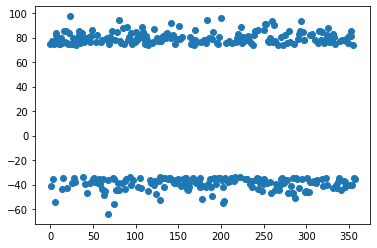

In [10]:
x = list(range(len(outliers_iqr(data,lowerfence,upperfence))))
plt.scatter(x=x , y = outliers_iqr(data,lowerfence,upperfence));

# OUTLIER TREATMENT:

In [11]:
import pandas as pd


In [12]:
csv_file = './data/mtcars.csv'
df = pd.read_csv(csv_file)
print(df.shape)
df.head()

(32, 12)


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# using iqr and boxplot method:

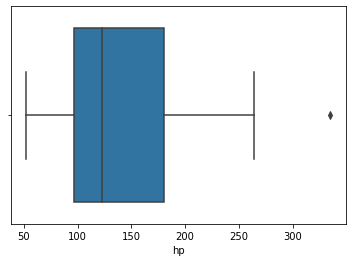

In [13]:
import seaborn as sns
sns.boxplot(data=df,x=df['hp']);

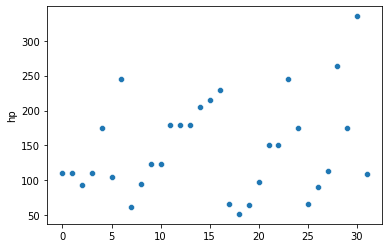

In [14]:
sns.scatterplot(data=df.hp);

In [15]:
Q1 = df['hp'].quantile(0.25)
Q3 = df['hp'].quantile(0.75)
IQR = Q3 - Q1

print('Q1 = ', Q1)
print('Q2 = ',Q3)
print('IQR = ',IQR)

Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print('Lower whisker = ',Lower_Whisker, ',Upper whisker = ', Upper_Whisker)

Q1 =  96.5
Q2 =  180.0
IQR =  83.5
Lower whisker =  -28.75 ,Upper whisker =  305.25


In [16]:
df = df[df['hp']< Upper_Whisker]
df.shape

(31, 12)

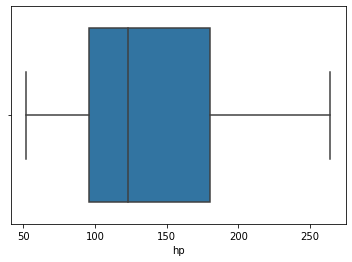

In [17]:
sns.boxplot(data=df,x=df['hp']);

# using zscore and scatter plot:

In [18]:
csv_file = './data/mpg.csv'
df = pd.read_csv(csv_file)
print(df.shape)
df.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [42]:
df.horsepower.replace(to_replace='?', value=0, inplace=True)

In [45]:
df.horsepower.replace(to_replace='?', value=0, inplace=True)

In [47]:
horsepower = df.horsepower
mean = np.mean(np.array(horsepower).astype(np.float))
std = np.std(np.array(horsepower).astype(np.float))
print('mean = ' , mean , ', standard deviation = ', std)


mean =  102.89447236180905 , standard deviation =  40.21892251464708


In [49]:
outliers=[]
for d in np.array(horsepower).astype(np.float):
    z = (d - mean)/std
    if z>3:
        outliers.append(d)
    if z<-3:
        outliers.append(d)
    
            
print(outliers)

[225.0, 225.0, 225.0, 230.0]


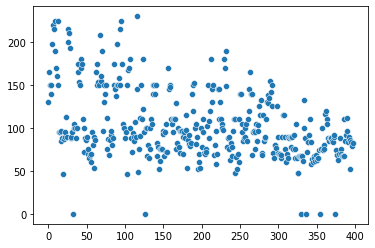

In [51]:
sns.scatterplot(data=np.array(horsepower).astype(np.float));

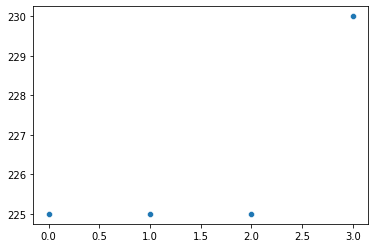

In [53]:
sns.scatterplot(data=outliers);